In [1]:
# import all libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from collections import Counter
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns

In [2]:
# the dataset used for this project comes from the Inside Airbnb website.
# the dataset is called listings.csv.gz and was collected on March 17th, 2020.
# the link to the dataset: http://data.insideairbnb.com/germany/be/berlin/2020-05-14/data/listings.csv.gz

listings_file = '../input/listings.csv'

# import columns we want to extract
columns = ['price',
           'summary',
           'neighbourhood_group_cleansed',
           'property_type',
           'room_type',
           'price',
           'number_of_reviews',
           'instant_bookable',
           'review_scores_rating',
           'beds',
           'bedrooms',
           'bathrooms',
           'accommodates',
           'amenities',
           'cancellation_policy',
           'reviews_per_month',
           'latitude',
           'longitude',
           'cleaning_fee',
           'security_deposit',
          'minimum_nights',
          'host_listings_count']

df = pd.read_csv(listings_file, usecols=columns)

df.head()

,summary,host_listings_count,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,...,amenities,price,security_deposit,cleaning_fee,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,reviews_per_month
0,This beautiful first floor apartment is situa...,1.0,Pankow,52.53500,13.41758,Apartment,Entire home/apt,4,1.0,1.0,...,"{Internet,Wifi,Kitchen,""Buzzer/wireless interc...",$90.00,$300.00,$100.00,62,145,93.0,f,strict_14_with_grace_period,1.11
1,First of all: I prefer short-notice bookings. ...,1.0,Tempelhof - Schöneberg,52.49885,13.34906,Apartment,Private room,1,1.0,1.0,...,"{Internet,Wifi,""Pets live on this property"",Ca...",$28.00,$250.00,$30.00,7,27,89.0,f,strict_14_with_grace_period,0.34
2,NaN,1.0,Friedrichshain-Kreuzberg,52.51171,13.45477,Loft,Entire home/apt,2,1.0,1.0,...,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$125.00,$0.00,$39.00,3,133,99.0,f,moderate,1.08
3,Cozy and large room in the beautiful district ...,2.0,Pankow,52.54316,13.41509,Apartment,Private room,2,1.0,1.0,...,"{Wifi,Heating,""Family/kid friendly"",Essentials...",$33.00,$0.00,$0.00,1,292,97.0,f,moderate,2.27
4,4 bedroom with very large windows and outstand...,1.0,Pankow,52.53303,13.41605,Apartment,Entire home/apt,7,2.5,4.0,...,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Paid par...",$180.00,$400.00,$80.00,6,8,100.0,f,strict_14_with_grace_period,0.14


In [3]:
df.describe()

,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,number_of_reviews,review_scores_rating,reviews_per_month
count,25142.000000,25164.000000,25164.000000,25164.000000,25146.000000,25131.000000,24951.000000,25164.000000,25164.000000,20137.000000,20636.000000
mean,3.923833,52.510156,13.405958,2.696034,1.104211,1.162707,1.610196,7.138571,21.685861,94.633262,1.019188
std,39.339598,0.031604,0.059446,1.598518,0.350335,0.680631,1.234585,26.736160,46.844958,7.759965,1.476905
min,0.000000,52.340480,13.097180,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,20.000000,0.010000
25%,1.000000,52.489180,13.373845,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,93.000000,0.140000
50%,1.000000,52.509640,13.416280,2.000000,1.000000,1.000000,1.000000,3.000000,5.000000,97.000000,0.440000
75%,2.000000,52.533043,13.439773,3.000000,1.000000,1.000000,2.000000,4.000000,18.000000,100.000000,1.260000
max,1384.000000,52.656630,13.758420,24.000000,8.500000,12.000000,24.000000,1124.000000,940.000000,100.000000,34.330000


In [4]:
df.isna().sum()

summary                         1249
host_listings_count               22
neighbourhood_group_cleansed       0
latitude                           0
longitude                          0
property_type                      0
room_type                          0
accommodates                       0
bathrooms                         18
bedrooms                          33
beds                             213
amenities                          0
price                              0
security_deposit                9696
cleaning_fee                    7439
minimum_nights                     0
number_of_reviews                  0
review_scores_rating            5027
instant_bookable                   0
cancellation_policy                0
reviews_per_month               4528
dtype: int64

In [5]:
df.columns

Index(['summary', 'host_listings_count', 'neighbourhood_group_cleansed',
       'latitude', 'longitude', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'amenities', 'price',
       'security_deposit', 'cleaning_fee', 'minimum_nights',
       'number_of_reviews', 'review_scores_rating', 'instant_bookable',
       'cancellation_policy', 'reviews_per_month'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25164 entries, 0 to 25163
Data columns (total 21 columns):
summary                         23915 non-null object
host_listings_count             25142 non-null float64
neighbourhood_group_cleansed    25164 non-null object
latitude                        25164 non-null float64
longitude                       25164 non-null float64
property_type                   25164 non-null object
room_type                       25164 non-null object
accommodates                    25164 non-null int64
bathrooms                       25146 non-null float64
bedrooms                        25131 non-null float64
beds                            24951 non-null float64
amenities                       25164 non-null object
price                           25164 non-null object
security_deposit                15468 non-null object
cleaning_fee                    17725 non-null object
minimum_nights                  25164 non-null int64
number_of_reviews      

**Cleaning The Data**

In [7]:
# replacing NaN values with 0
df.summary.fillna(0, inplace=True)
df.review_scores_rating.fillna(0, inplace=True)
df.reviews_per_month.fillna(0, inplace=True)
df.host_listings_count.fillna(0, inplace=True)

# since the hosts do not charge any extra cleaning fee/security deposits, we can replace these null values with $0.00
df.security_deposit.fillna('$0.00', inplace=True)
df.cleaning_fee.fillna('$0.00', inplace=True)

# removing $ in front of each value and commas in the middle so we can convert the string values into numerical ones
df.price = df.price.str.replace('$', '').str.replace(',', '').astype(float)
df.cleaning_fee = df.cleaning_fee.str.replace('$', '').str.replace(',', '').astype(float)
df.security_deposit = df.security_deposit.str.replace('$', '').str.replace(',', '').astype(float)

# removing rows with missing values NaN's in bathrooms, bedrooms and beds
df.dropna(subset=['bathrooms', 'bedrooms', 'beds'], inplace=True)

print("The dataset has {} rows and {} columns after being preprocessed.".format(*df.shape))

The dataset has 24915 rows and 21 columns after being preprocessed.


In [8]:
df.isna().sum()

summary                         0
host_listings_count             0
neighbourhood_group_cleansed    0
latitude                        0
longitude                       0
property_type                   0
room_type                       0
accommodates                    0
bathrooms                       0
bedrooms                        0
beds                            0
amenities                       0
price                           0
security_deposit                0
cleaning_fee                    0
minimum_nights                  0
number_of_reviews               0
review_scores_rating            0
instant_bookable                0
cancellation_policy             0
reviews_per_month               0
dtype: int64

In [9]:
df.head()

,summary,host_listings_count,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,...,amenities,price,security_deposit,cleaning_fee,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,reviews_per_month
0,This beautiful first floor apartment is situa...,1.0,Pankow,52.53500,13.41758,Apartment,Entire home/apt,4,1.0,1.0,...,"{Internet,Wifi,Kitchen,""Buzzer/wireless interc...",90.0,300.0,100.0,62,145,93.0,f,strict_14_with_grace_period,1.11
1,First of all: I prefer short-notice bookings. ...,1.0,Tempelhof - Schöneberg,52.49885,13.34906,Apartment,Private room,1,1.0,1.0,...,"{Internet,Wifi,""Pets live on this property"",Ca...",28.0,250.0,30.0,7,27,89.0,f,strict_14_with_grace_period,0.34
2,0,1.0,Friedrichshain-Kreuzberg,52.51171,13.45477,Loft,Entire home/apt,2,1.0,1.0,...,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",125.0,0.0,39.0,3,133,99.0,f,moderate,1.08
3,Cozy and large room in the beautiful district ...,2.0,Pankow,52.54316,13.41509,Apartment,Private room,2,1.0,1.0,...,"{Wifi,Heating,""Family/kid friendly"",Essentials...",33.0,0.0,0.0,1,292,97.0,f,moderate,2.27
4,4 bedroom with very large windows and outstand...,1.0,Pankow,52.53303,13.41605,Apartment,Entire home/apt,7,2.5,4.0,...,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Paid par...",180.0,400.0,80.0,6,8,100.0,f,strict_14_with_grace_period,0.14


Text(0.5, 1.0, 'Property Type Distribution\n')

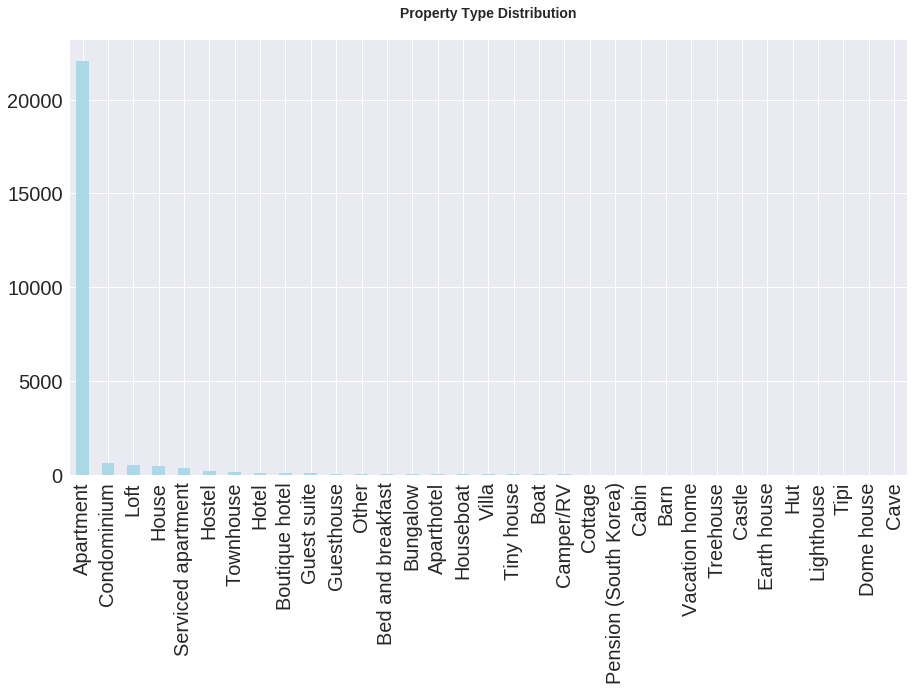

In [10]:
property_df = df.property_type.value_counts()
property_df.columns = ['property_type']
property_df.plot.bar(y= 'property_type', 
                     color = 'LightBlue',
                     fontsize = 20,
                     legend = False,
                     figsize= (15, 8))

plt.title('Property Type Distribution\n', fontsize=14, fontweight='bold')

In [11]:
#check the number of different property types
df.property_type.value_counts()

Apartment                22084
Condominium                618
Loft                       503
House                      474
Serviced apartment         339
Hostel                     218
Townhouse                  116
Hotel                      105
Boutique hotel              92
Guest suite                 68
Guesthouse                  58
Other                       35
Bed and breakfast           34
Bungalow                    28
Aparthotel                  26
Houseboat                   24
Villa                       17
Tiny house                  13
Boat                        12
Camper/RV                   11
Cottage                      8
Pension (South Korea)        8
Cabin                        7
Barn                         4
Vacation home                3
Treehouse                    2
Castle                       2
Earth house                  1
Hut                          1
Lighthouse                   1
Tipi                         1
Dome house                   1
Cave    

Text(0.5, 1.0, 'Room Type Distribution\n')

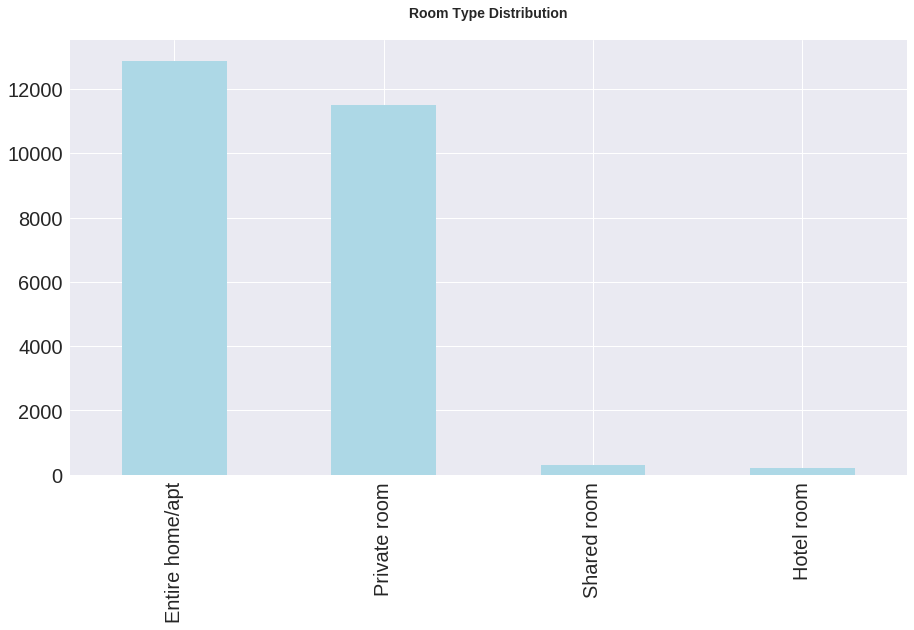

In [12]:
property_df = df.room_type.value_counts()
property_df.columns = ['room_type']
property_df.plot.bar(y= 'room_type', 
                     color = 'LightBlue',
                     fontsize = 20,
                     legend = False,
                     figsize= (15, 8))

plt.title('Room Type Distribution\n', fontsize=14, fontweight='bold')

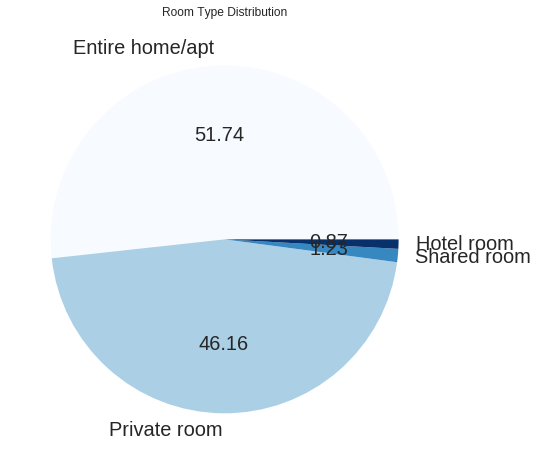

In [13]:
property_df.columns = ['room_type']
property_df.plot.pie(y = 'room_type', 
                 colormap = 'Blues', 
                 figsize=(15,8), 
                 fontsize = 20, autopct = '%.2f',
                 legend = False,
                 title = 'Room Type Distribution',
                 label='')


In [14]:
# check the number of different room types
df.room_type.value_counts()

Entire home/apt    12890
Private room       11502
Shared room          306
Hotel room           217
Name: room_type, dtype: int64

In [15]:
# check the mean price of the listings
df['price'].describe()

count    24915.000000
mean        74.316837
std        227.221777
min          0.000000
25%         35.000000
50%         50.000000
75%         79.000000
max       9000.000000
Name: price, dtype: float64

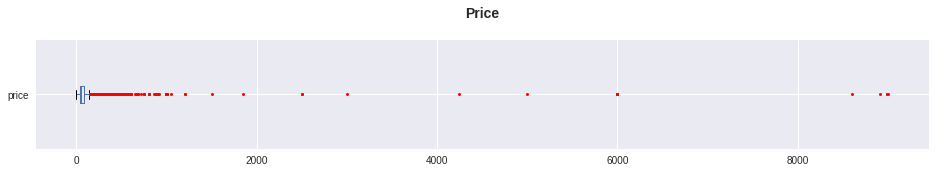

In [16]:
# plot the price distribution box
box_plot = dict(markerfacecolor='r', markeredgecolor='r', marker='.')
price_dist = df['price'].plot(kind='box', vert=False, flierprops=box_plot, title = "Price", figsize=(16,2));
plt.title('Price\n', fontsize=14, fontweight='bold')
price_dist

In [17]:
# 75% of the apartments charge up to 80$ - but the maximum value is 9000€
# let's decide on a limit of 500$, and drop all outliers that charge more than that

df.drop(df[(df.price > 500)].index, axis=0, inplace=True)
print("The dataset has {} rows and {} columns - after dropping irrelevant rows.".format(*df.shape))

The dataset has 24786 rows and 21 columns - after dropping irrelevant rows.


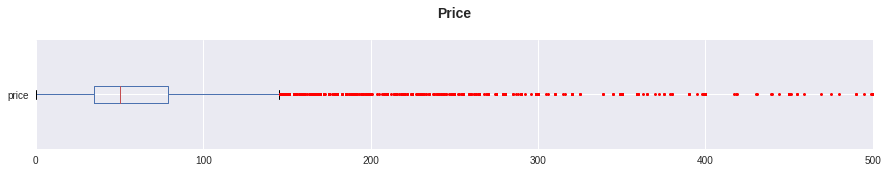

In [18]:
# plot the price distribution box after dropping the listings
box_plot = dict(markerfacecolor='r', markeredgecolor='r', marker='.')
price_dist = df['price'].plot(kind='box', xlim=(0,500), vert=False, flierprops=box_plot, figsize=(15,2));
plt.title('Price\n', fontsize=14, fontweight='bold')
price_dist

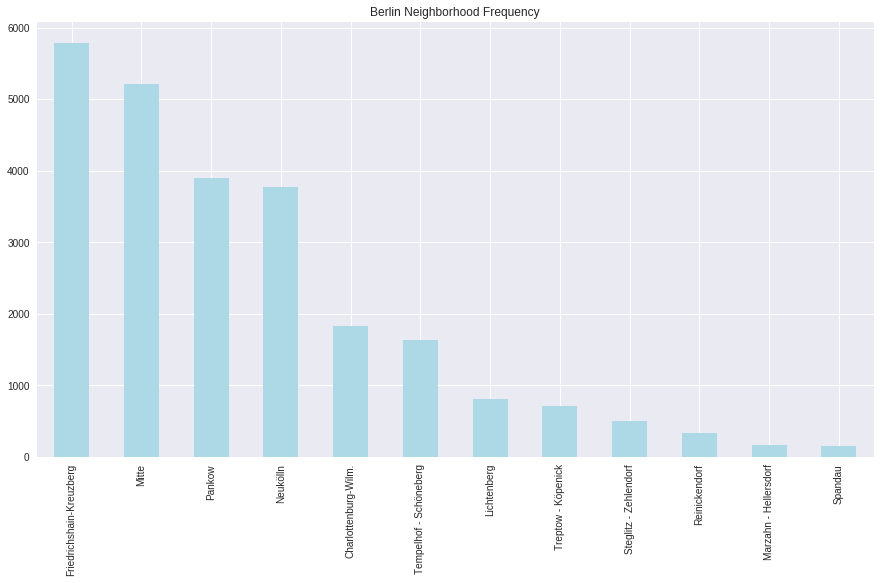

In [19]:
# let's visualize the frequency of listings separated by neighborhood
neighborhoods_df = df.neighbourhood_group_cleansed.value_counts()
neighborhoods_df.plot(kind='bar',
           color = 'LightBlue', 
           figsize =(15,8),
           title = 'Berlin Neighborhood Frequency', 
           legend = False)

In [20]:
# let's analyze frequency of each listing based on neighborhood

neighborhoods_df = df.neighbourhood_group_cleansed.value_counts()
neighborhoods_df

Friedrichshain-Kreuzberg    5791
Mitte                       5208
Pankow                      3903
Neukölln                    3765
Charlottenburg-Wilm.        1826
Tempelhof - Schöneberg      1637
Lichtenberg                  804
Treptow - Köpenick           709
Steglitz - Zehlendorf        505
Reinickendorf                328
Marzahn - Hellersdorf        159
Spandau                      151
Name: neighbourhood_group_cleansed, dtype: int64

In [21]:
#let's check the average price for the listing in Berlin
average_price = sum(df.price) / float(len(df.price))
average_price

63.87860082304527

Text(0.5, 1.0, 'Mean Prices by Neighbourhood\n')

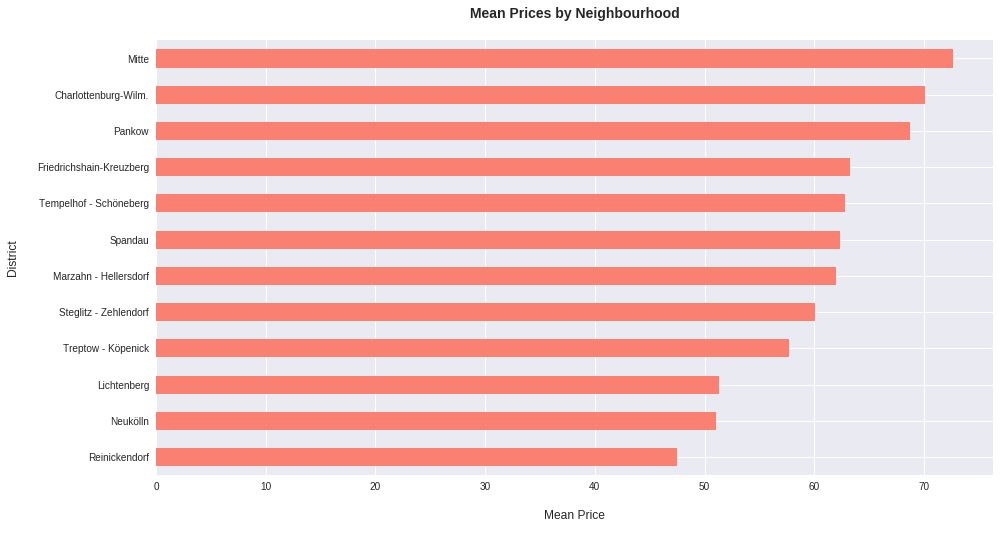

In [22]:
# group_by neighbourhood groups, take the median price and store new values in sub_df 
df_grouped = pd.DataFrame(df.groupby(['neighbourhood_group_cleansed'])['price'].agg(np.mean))
df_grouped.reset_index(inplace=True)

# plot this 
df_grouped.sort_values(by=['price'], ascending=True)\
          .plot(kind='barh', x='neighbourhood_group_cleansed', y='price', 
                figsize=(15,8), legend=False, color='salmon')

plt.xlabel('\nMean Price\n', fontsize=12)
plt.ylabel('District\n', fontsize=12)
plt.title('Mean Prices by Neighbourhood\n', fontsize=14, fontweight='bold')

In [23]:
# extracting the names
neighborhood_names = list(neighborhoods_df.keys())

nh_prices = df[['neighbourhood_group_cleansed', 'price']]
nh_prices.columns = ['neighbourhood', 'price']

nh_prices = nh_prices[nh_prices['neighbourhood'].isin(neighborhood_names)]

nh_prices_group = nh_prices.groupby('neighbourhood')
nh_prices = nh_prices_group['price'].agg(np.mean)

nh_prices

neighbourhood
Charlottenburg-Wilm.        70.074480
Friedrichshain-Kreuzberg    63.249870
Lichtenberg                 51.328358
Marzahn - Hellersdorf       61.993711
Mitte                       72.674923
Neukölln                    51.008499
Pankow                      68.751473
Reinickendorf               47.493902
Spandau                     62.324503
Steglitz - Zehlendorf       60.061386
Tempelhof - Schöneberg      62.813684
Treptow - Köpenick          57.705219
Name: price, dtype: float64

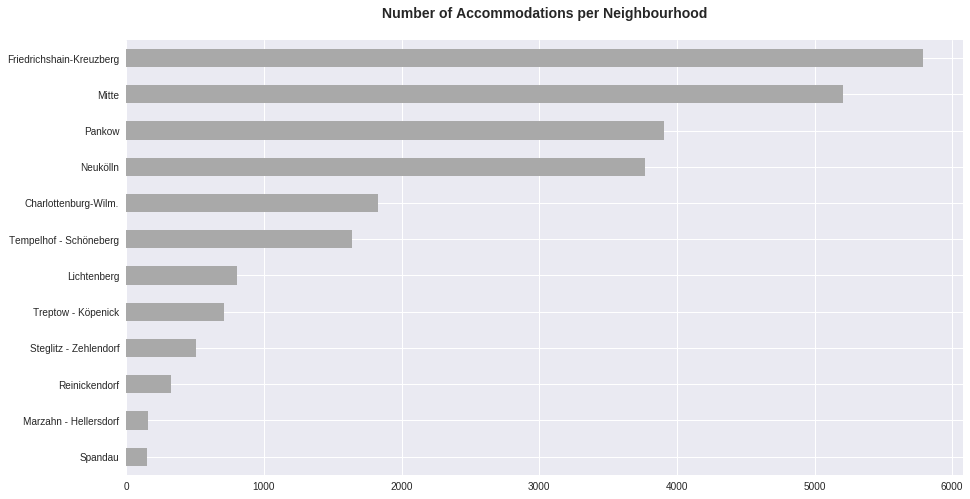

In [24]:
df['neighbourhood_group_cleansed'].value_counts().sort_values().plot(kind='barh', color='darkgrey', figsize=(15,8))
plt.title('Number of Accommodations per Neighbourhood\n', fontsize=14, fontweight='bold');

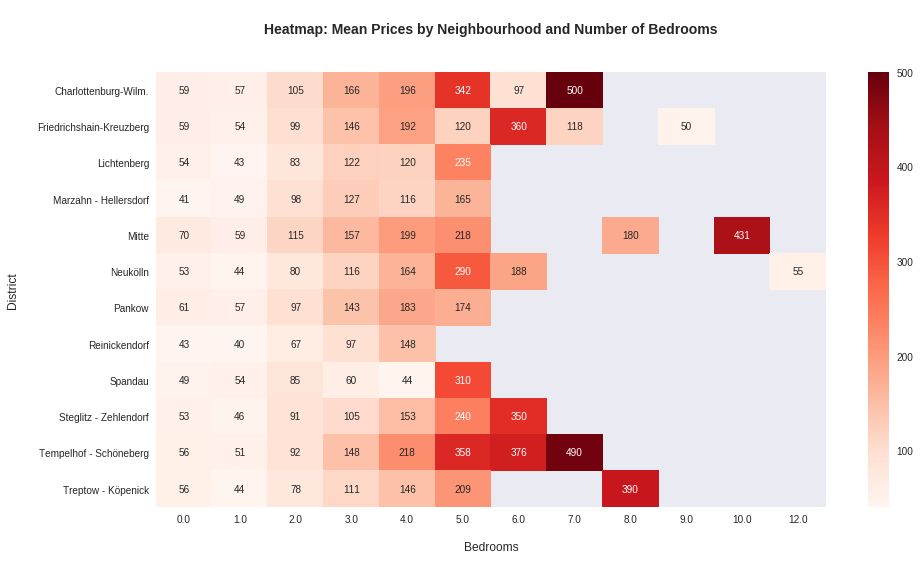

In [25]:
plt.figure(figsize=(15,8))
sns.heatmap(df.groupby(['neighbourhood_group_cleansed', 'bedrooms']).price.mean().unstack(), 
            cmap='Reds', annot=True, fmt=".0f")

plt.xlabel('\nBedrooms', fontsize=12)
plt.ylabel('District\n', fontsize=12)
plt.title('\nHeatmap: Mean Prices by Neighbourhood and Number of Bedrooms\n\n', fontsize=14, fontweight='bold');

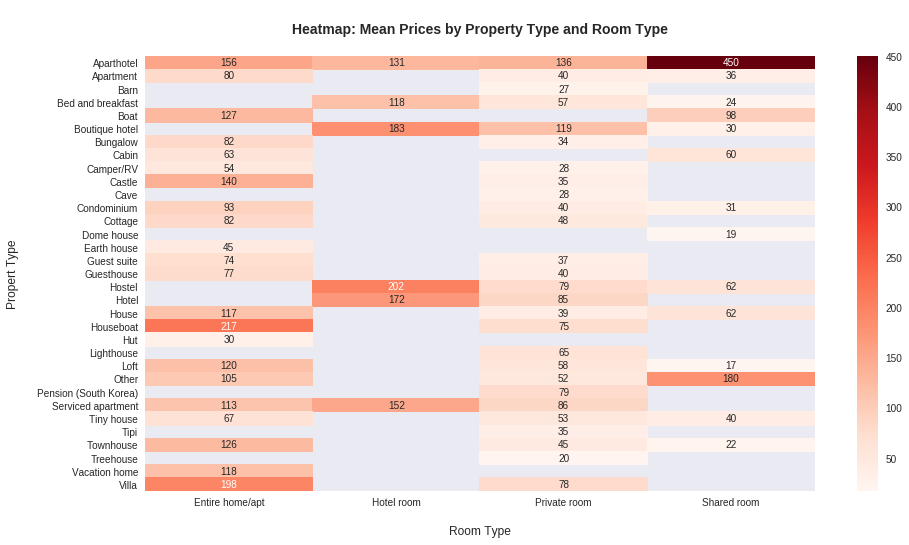

In [26]:
plt.figure(figsize=(15,8))
sns.heatmap(df.groupby(['property_type', 'room_type']).price.mean().unstack(), 
            cmap='Reds', annot=True, fmt=".0f")

plt.xlabel('\nRoom Type', fontsize=12)
plt.ylabel('Propert Type\n', fontsize=12)
plt.title('\nHeatmap: Mean Prices by Property Type and Room Type\n', fontsize=14, fontweight='bold');

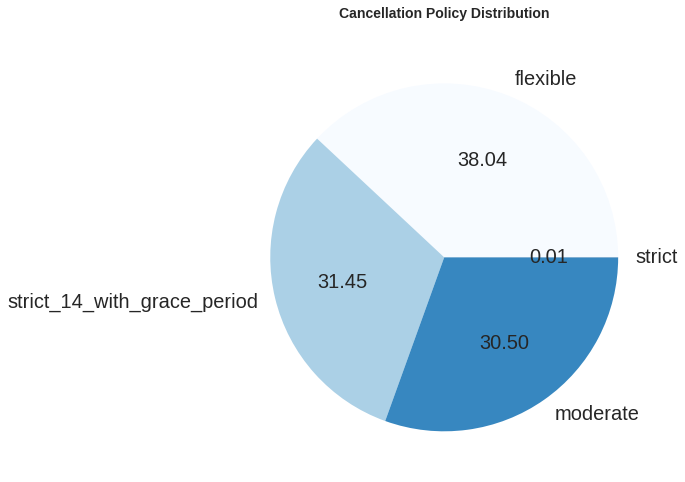

In [27]:
# creating cancellation policy dataframe
cancel_df=df.cancellation_policy

# cleaning up small values
cancel_df = cancel_df[(cancel_df != 'super_strict_30') & (cancel_df != 'super_strict_60')]

cancel_df = cancel_df.value_counts()

cancel_df.columns = ['Cancellation Policy']
cancel_df.plot.pie(y = 'Cancellation Policy',
                   colormap = 'Blues',
                   figsize=(15,8),
                   fontsize = 20, 
                   autopct = '%.2f',
                   legend = False,
                   label='')

plt.title('Cancellation Policy Distribution\n', fontsize=14, fontweight='bold');


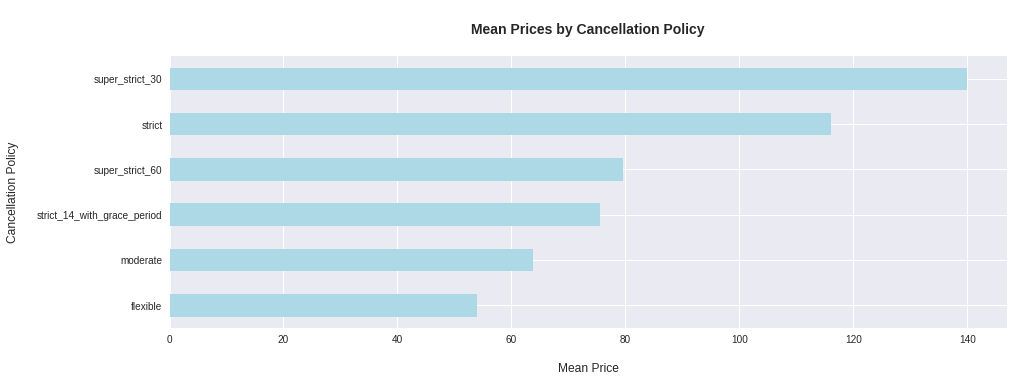

In [28]:
# group_by neighbourhood groups, take the mean price
df_grouped = pd.DataFrame(df.groupby(['cancellation_policy'])['price'].agg(np.mean))
df_grouped.reset_index(inplace=True)

df_grouped.sort_values(by=['price'], ascending=True)\
          .plot(kind='barh', x='cancellation_policy', y='price', 
                figsize=(15,5), legend=False, color='lightBlue')

plt.xlabel('\nMean Price', fontsize=12)
plt.ylabel('Cancellation Policy\n', fontsize=12)
plt.title('\nMean Prices by Cancellation Policy\n', fontsize=14, fontweight='bold');

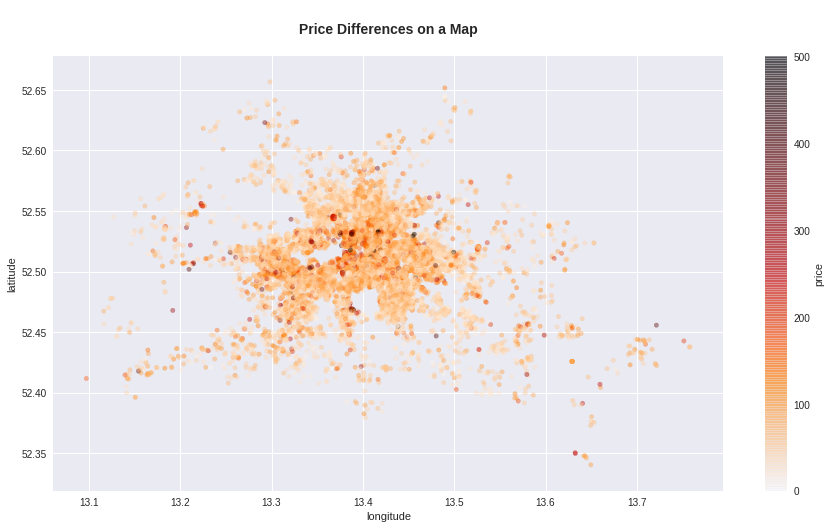

In [29]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
        c="price", cmap="gist_heat_r", colorbar=True, sharex=False, figsize=(15,8));
plt.title('\nPrice Differences on a Map\n', fontsize=14, fontweight='bold');

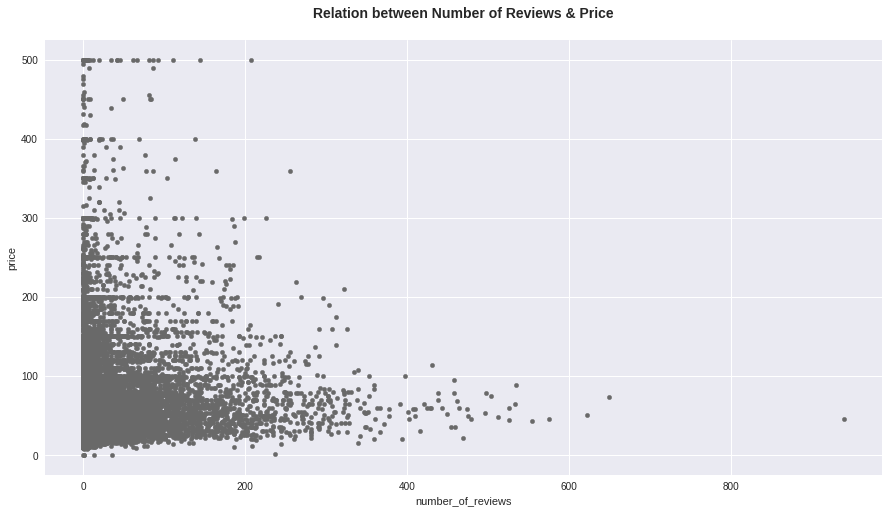

In [30]:
df.plot.scatter(x="number_of_reviews", y="price", figsize=(15,8), c='dimgrey')
plt.title('Relation between Number of Reviews & Price\n', fontsize=14, fontweight='bold');

In [31]:
# location is an important factor often correlated with the listings' price. Instead of trying to relate the location to the specific neighbourhood / area
# we can calculate the distance of each listing to Alexanderplatz square that is often considered to be a center of Berlin.
# Geopy can calculate the distance between two points using the great-circle distance.

from geopy.distance import great_circle

def calculate_distance(latitude, longitude):
    berlin_center = (52.522396, 13.414003)

    listing = (latitude, longitude)
    return great_circle(berlin_center, listing).km

df['distance'] = df.apply(lambda x: calculate_distance(x.latitude, x.longitude), axis=1)
df.head()

,summary,host_listings_count,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,...,price,security_deposit,cleaning_fee,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,reviews_per_month,distance
0,This beautiful first floor apartment is situa...,1.0,Pankow,52.53500,13.41758,Apartment,Entire home/apt,4,1.0,1.0,...,90.0,300.0,100.0,62,145,93.0,f,strict_14_with_grace_period,1.11,1.422238
1,First of all: I prefer short-notice bookings. ...,1.0,Tempelhof - Schöneberg,52.49885,13.34906,Apartment,Private room,1,1.0,1.0,...,28.0,250.0,30.0,7,27,89.0,f,strict_14_with_grace_period,0.34,5.115770
2,0,1.0,Friedrichshain-Kreuzberg,52.51171,13.45477,Loft,Entire home/apt,2,1.0,1.0,...,125.0,0.0,39.0,3,133,99.0,f,moderate,1.08,3.003533
3,Cozy and large room in the beautiful district ...,2.0,Pankow,52.54316,13.41509,Apartment,Private room,2,1.0,1.0,...,33.0,0.0,0.0,1,292,97.0,f,moderate,2.27,2.310025
4,4 bedroom with very large windows and outstand...,1.0,Pankow,52.53303,13.41605,Apartment,Entire home/apt,7,2.5,4.0,...,180.0,400.0,80.0,6,8,100.0,f,strict_14_with_grace_period,0.14,1.190529


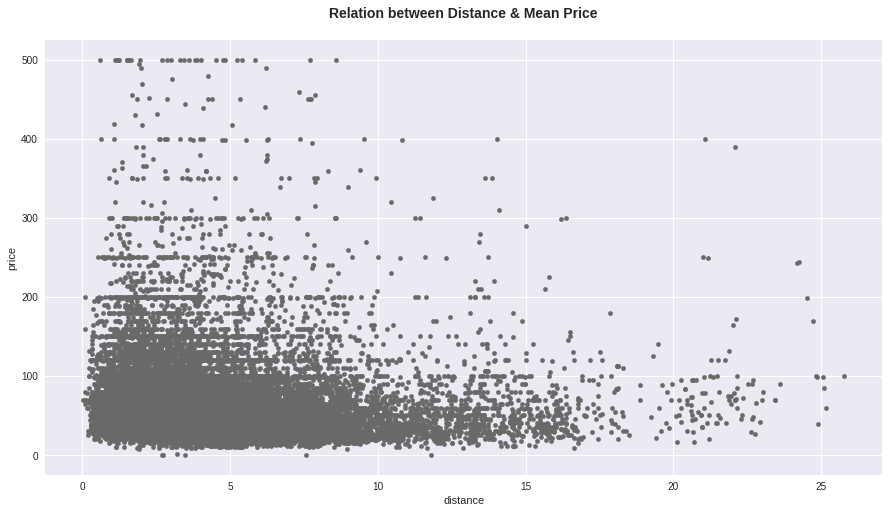

In [32]:
df.plot.scatter(x="distance", y="price", figsize=(15,8), c='dimgrey')
plt.title('Relation between Distance & Mean Price\n', fontsize=14, fontweight='bold');

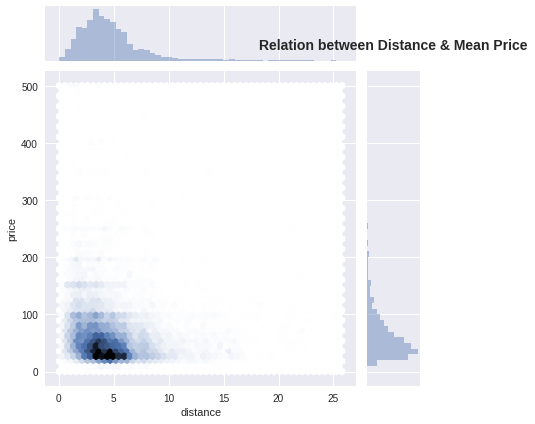

In [33]:
sns.jointplot(x=df["distance"], y=df["price"], kind='hex')
plt.title('\nRelation between Distance & Mean Price\n', fontsize=14, fontweight='bold');

In [34]:
# as we work with the distance to the center, let's drop the neighbourhood_group_cleansed. 
# we also get rid of summary as we can't use it for the analysis
# property_types may also not be that helpful as most of our listings are apartments.

data = df[['price',
           'room_type',
           'number_of_reviews',
           'instant_bookable',
           'review_scores_rating',
           'beds',
           'bedrooms',
           'bathrooms',
           'accommodates',
           'amenities',
           'cancellation_policy',
           'reviews_per_month',
           'cleaning_fee',
           'security_deposit',
           'minimum_nights',
           'distance',
          'host_listings_count']]

In [35]:
# splitting the amenities list to draw out how many amenities each listing has

amenities_list = []

for element in data.amenities:
    element = element[1:]
    element = element[:-1]
    x = element.split()
    amenities_list.append(len(x))

data.amenities = amenities_list

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [36]:
data.head()

,price,room_type,number_of_reviews,instant_bookable,review_scores_rating,beds,bedrooms,bathrooms,accommodates,amenities,cancellation_policy,reviews_per_month,cleaning_fee,security_deposit,minimum_nights,distance,host_listings_count
0,90.0,Entire home/apt,145,f,93.0,2.0,1.0,1.0,4,14,strict_14_with_grace_period,1.11,100.0,300.0,62,1.422238,1.0
1,28.0,Private room,27,f,89.0,1.0,1.0,1.0,1,30,strict_14_with_grace_period,0.34,30.0,250.0,7,5.115770,1.0
2,125.0,Entire home/apt,133,f,99.0,1.0,1.0,1.0,2,16,moderate,1.08,39.0,0.0,3,3.003533,1.0
3,33.0,Private room,292,f,97.0,2.0,1.0,1.0,2,16,moderate,2.27,0.0,0.0,1,2.310025,2.0
4,180.0,Entire home/apt,8,f,100.0,7.0,4.0,2.5,7,27,strict_14_with_grace_period,0.14,80.0,400.0,6,1.190529,1.0


In [37]:
# use pandas get_dummies function to convert the categorical variable into indicator variables

cancel_policy = pd.get_dummies(data.cancellation_policy).astype(int)
instant_booking = pd.get_dummies(data.instant_bookable, prefix = 'instant_booking').astype(int)
room_type = pd.get_dummies(data.room_type).astype(int)

# since there are 2 instant booking columns, we can just drop one of them.
instant_booking = instant_booking.drop('instant_booking_f', axis = 1)

# drop the original columns and replace them with indicator columns
data = data.drop(['cancellation_policy', 'instant_bookable', 'room_type'], axis = 1)
data = pd.concat((data, cancel_policy, instant_booking, room_type), axis = 1)

In [38]:
data.head()

,price,number_of_reviews,review_scores_rating,beds,bedrooms,bathrooms,accommodates,amenities,reviews_per_month,cleaning_fee,...,moderate,strict,strict_14_with_grace_period,super_strict_30,super_strict_60,instant_booking_t,Entire home/apt,Hotel room,Private room,Shared room
0,90.0,145,93.0,2.0,1.0,1.0,4,14,1.11,100.0,...,0,0,1,0,0,0,1,0,0,0
1,28.0,27,89.0,1.0,1.0,1.0,1,30,0.34,30.0,...,0,0,1,0,0,0,0,0,1,0
2,125.0,133,99.0,1.0,1.0,1.0,2,16,1.08,39.0,...,1,0,0,0,0,0,1,0,0,0
3,33.0,292,97.0,2.0,1.0,1.0,2,16,2.27,0.0,...,1,0,0,0,0,0,0,0,1,0
4,180.0,8,100.0,7.0,4.0,2.5,7,27,0.14,80.0,...,0,0,1,0,0,0,1,0,0,0


In [39]:
# import train_test_split function
from sklearn.model_selection import train_test_split
# import metrics
from sklearn.metrics import mean_squared_error, r2_score

# create target and features
a = data.drop(['price'], axis = 1)
b = data.price

# split our data
X_train, X_test, y_train, y_test = train_test_split(a, b, test_size=0.2, random_state=13)

In [40]:
# scale data and normalize the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

In [41]:
from sklearn import linear_model
from sklearn import metrics

# linear regression testing
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
r2_lr = metrics.r2_score(y_test, reg.predict(X_test))

y_test_pred = reg.predict(X_test)
y_train_pred = reg.predict(X_train)

print (f"r2: {round(r2_lr, 5)}")

r2: 0.46209


In [42]:
# ridge model testing
ridge = linear_model.Ridge()
ridge.fit(X_train, y_train)
r2_rr = metrics.r2_score(y_test, ridge.predict(X_test))

y_test_pred = ridge.predict(X_test)
y_train_pred = ridge.predict(X_train)

print (f"r2: {round(r2_rr, 5)}")


r2: 0.4622


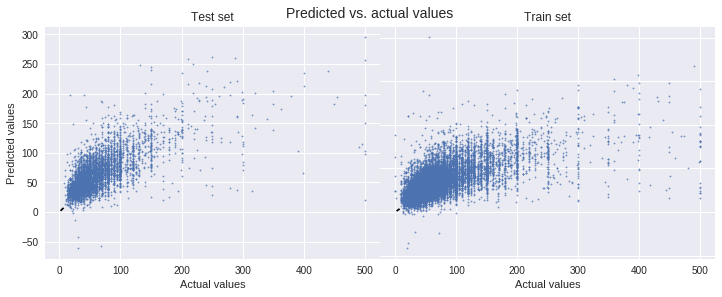

In [43]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
fig.suptitle('Predicted vs. actual values', fontsize=14, y=1)
plt.subplots_adjust(top=0.93, wspace=0)
    
ax1.scatter(y_test, y_test_pred, s=2, alpha=0.7)
ax1.plot(list(range(2,8)), list(range(2,8)), color='black', linestyle='--')
ax1.set_title('Test set')
ax1.set_xlabel('Actual values')
ax1.set_ylabel('Predicted values')
    
ax2.scatter(y_train, y_train_pred, s=2, alpha=0.7)
ax2.plot(list(range(2,8)), list(range(2,8)), color='black', linestyle='--')
ax2.set_title('Train set')
ax2.set_xlabel('Actual values')
ax2.set_ylabel('')
ax2.set_yticklabels(labels='')

plt.show()

In [44]:
import xgboost as xgb
# create a baseline
booster = xgb.XGBRegressor()

In [45]:
from sklearn.model_selection import GridSearchCV

# create Grid of parameters
param_grid = {'n_estimators': [100, 150, 200],
              'learning_rate': [0.01, 0.05, 0.1], 
              'max_depth': [3, 4, 5, 6, 7],
              'colsample_bytree': [0.6, 0.7, 1],
              'gamma': [0.0, 0.1, 0.2]}

# instantiate the tuned random forest
booster_grid_search = GridSearchCV(booster, param_grid, cv=3, n_jobs=-1)

# train the tuned random forest
booster_grid_search.fit(X_train, y_train)

# print best estimator parameters found during the grid search
print(booster_grid_search.best_params_)

{'colsample_bytree': 0.6, 'gamma': 0.0, 'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 200}


In [46]:
# instantiate xgboost with the most optimal parameters
booster = xgb.XGBRegressor(colsample_bytree=0.6, gamma=0.2, learning_rate=0.05, 
                           max_depth=7, n_estimators=100, random_state=4)

# train the model
booster.fit(X_train, y_train)

# predict the values
y_pred_train = booster.predict(X_train)
y_pred_test = booster.predict(X_test)

In [47]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f"RMSE: {round(RMSE, 5)}")

RMSE: 33.26744


In [48]:
r2 = r2_score(y_test, y_pred_test)
r2
print(f"r2: {round(r2, 5)}")

r2: 0.55135


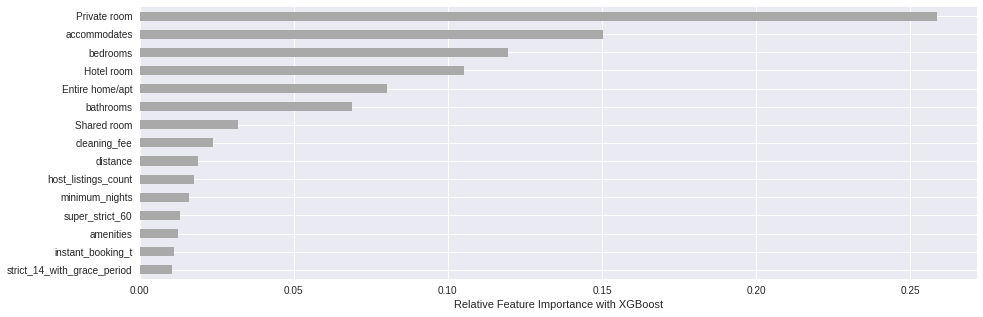

In [49]:
# plot the important features
features_importance = pd.Series(booster.feature_importances_, index=a.columns)
features_importance.nlargest(15).sort_values().plot(kind='barh', color='darkgrey', figsize=(15,5))
plt.xlabel('Relative Feature Importance with XGBoost');